In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [134]:
# Read X data set into a pandas DataFrame named X
X = pd.read_csv('./Flash/X.csv')
# Drop the time stamp column
Y = pd.read_csv('./Flash/Y.csv')

X

,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,2016-11-22 08:52:34,1.00,0.54,0.13,0.00,98.33,4.95,0.99,0.99,0.00,...,1416704,1715773,882,1189,513308,552075,1195,873,376047,669822
1,2016-11-22 08:52:37,0.84,0.29,0.17,0.00,98.70,6.00,0.00,0.00,0.00,...,1337184,1797629,897,1224,495878,603664,1224,898,405288,668193
2,2016-11-22 08:52:38,1.29,0.50,0.21,0.00,97.99,7.00,2.00,1.00,0.00,...,1348824,1743474,891,1236,488287,577703,1259,895,411853,665647
3,2016-11-22 08:52:41,1.05,0.38,0.25,0.00,98.32,4.12,1.03,2.06,0.00,...,1304328,1919137,1090,1381,510038,636490,1390,1090,463329,666394
4,2016-11-22 08:52:42,1.17,0.38,0.08,0.04,98.33,5.10,1.02,0.00,1.02,...,1380372,1729459,828,1091,504973,492315,1082,830,326643,727070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,2016-11-22 21:20:45,0.08,0.25,0.04,0.04,99.58,0.98,1.96,0.98,0.98,...,189532,180323,288,371,189901,180212,372,288,115112,318773
19440,2016-11-22 21:20:50,0.08,0.25,0.00,0.00,99.67,0.00,3.00,0.00,0.00,...,169628,271162,323,459,166344,273393,451,321,166157,270466
19441,2016-11-22 21:21:02,0.12,0.50,0.00,0.00,99.38,0.00,1.00,0.00,0.00,...,179659,239271,300,414,171833,228633,413,301,144588,284846
19442,2016-11-22 21:21:26,0.13,0.25,0.04,0.00,99.58,0.00,2.00,1.00,0.00,...,174173,216407,298,403,176157,207719,409,302,136640,293808


In [135]:
Y_D=Y.drop("TimeStamp",1)
X_D=X.drop("TimeStamp",1)

XY = pd.concat([X_D,Y['ReadsAvg'],Y['WritesAvg']], axis=1)
XY_= pd.concat([X,Y['ReadsAvg'],Y['WritesAvg']], axis=1)
XY_sample=XY_.sample(n=int(X.shape[0]/2))

In [136]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(XY_sample, test_size = 0.3,random_state = 2)

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)
train.to_csv("./Flash/train.csv")
test.to_csv("./Flash/test.csv")


In [2]:
train = pd.read_csv('./Flash/train.csv')
# Drop the time stamp column
test = pd.read_csv('./Flash/test.csv')
train= train.loc[:, (train != 0).any(axis=0)]
#test=???

In [75]:
train

,Unnamed: 0,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,...,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1,ReadsAvg,WritesAvg
0,1,2016-11-22 08:52:37,0.84,0.29,0.17,0.00,98.70,6.00,0.00,0.0,...,897,1224,495878,603664,1224,898,405288,668193,59.3928,113.4178
1,2,2016-11-22 08:52:38,1.29,0.50,0.21,0.00,97.99,7.00,2.00,1.0,...,891,1236,488287,577703,1259,895,411853,665647,58.3325,109.1802
2,7,2016-11-22 08:52:46,1.08,0.58,0.13,0.04,98.17,2.00,2.00,0.0,...,922,1218,503116,642206,1220,922,417946,751137,58.8779,114.7778
3,15,2016-11-22 08:52:55,0.71,0.29,0.17,0.04,98.79,3.00,2.00,1.0,...,914,1284,492803,601726,1278,914,415035,636155,57.3831,107.6095
4,16,2016-11-22 08:52:56,0.84,0.21,0.04,0.04,98.87,4.00,2.00,1.0,...,863,1216,498189,533934,1216,864,381893,640162,52.5361,106.5753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,19425,2016-11-22 21:20:27,0.17,0.17,0.00,0.00,99.67,0.99,0.99,0.0,...,983,1417,489672,578816,1413,973,459845,595712,53.3583,107.0919
6801,19429,2016-11-22 21:20:33,0.17,0.17,0.00,0.00,99.67,0.00,1.00,0.0,...,990,1383,489621,547115,1383,990,451541,604013,53.4440,106.7679
6802,19430,2016-11-22 21:20:34,0.04,0.33,0.00,0.00,99.62,0.00,0.00,0.0,...,1034,1696,473274,650676,1695,1034,533322,577530,53.8170,106.2969
6803,19436,2016-11-22 21:20:42,0.08,0.29,0.00,0.00,99.62,0.00,0.00,0.0,...,326,445,173213,258979,444,326,161897,287605,53.5572,107.2379


In [3]:
train_ = train.drop("TimeStamp",1)
test_= train.drop("TimeStamp",1)

In [88]:
train.columns

Index(['Unnamed: 0', 'TimeStamp', '0_all_..usr', '0_all_..sys',
       '0_all_..iowait', '0_all_..soft', '0_all_..idle', '0_cpu0_.usr',
       '0_cpu0_.sys', '0_cpu0_.iowait',
       ...
       '40_RxPacktes.1', '40_TxPacktes.1', '40_RxBytes.1', '40_TxBytes.1',
       '41_RxPacktes.1', '41_TxPacktes.1', '41_RxBytes.1', '41_TxBytes.1',
       'ReadsAvg', 'WritesAvg'],
      dtype='object', length=1712)

In [4]:
# Extract X,Y components from test and train sets
X_train = train.drop("TimeStamp",1)
X_train = X_train.drop('Unnamed: 0',1)
X_train = X_train.drop("ReadsAvg",1)
X_train = X_train.drop("WritesAvg",1)
X_test = test.drop("TimeStamp",1)
X_test = X_test.drop('Unnamed: 0',1)
X_test = X_test.drop("ReadsAvg",1)
X_test = X_test.drop("WritesAvg",1)
Y_train_r = train["ReadsAvg"]
#Y_train_w = train["WritesAvg"]
Y_test_r = test["ReadsAvg"]
#Y_test_w = test["WritesAvg"]

In [139]:
X_train

,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,0_cpu0_.idle,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,1.13,0.33,0.25,0.04,98.24,1.02,1.02,1.02,0.0,96.94,...,1330999,1669768,915,1156,499427,666471,1153,914,415715,804438
1,1.09,0.25,0.17,0.00,98.50,2.02,0.00,0.00,0.0,97.98,...,1353686,1765992,875,1219,493227,556238,1221,875,395636,629339
2,1.13,0.50,0.13,0.00,98.25,2.00,2.00,1.00,0.0,95.00,...,1325916,1585870,882,1268,473925,674850,1297,881,438570,620107
3,1.21,0.29,0.25,0.00,98.24,2.02,1.01,0.00,0.0,96.97,...,1353778,1945828,913,1257,476068,736944,1261,913,464454,707748
4,0.84,0.21,0.04,0.04,98.87,4.00,2.00,1.00,0.0,93.00,...,1347406,1798165,863,1216,498189,533934,1216,864,381893,640162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,0.04,0.17,0.04,0.00,99.75,0.00,3.03,0.00,0.0,96.97,...,503458,622721,1232,1681,800771,550252,1681,1222,472054,914471
6801,0.21,0.17,0.00,0.00,99.62,0.00,0.00,0.00,0.0,100.00,...,468607,626603,1042,1490,468382,626987,1495,1043,520628,574176
6802,0.08,0.29,0.04,0.00,99.58,0.00,0.00,1.01,0.0,98.99,...,172000,212723,281,374,174446,190978,375,281,122982,291734
6803,0.13,0.25,0.04,0.00,99.58,0.00,2.00,1.00,0.0,97.00,...,174173,216407,298,403,176157,207719,409,302,136640,293808


In [140]:
### Feature selection

In [147]:
'''
start_time = time.time()
corr=train_.corr()
corr['sq_r'] = corr.ReadsAvg**2
corr_r = corr.sort_values('sq_r',ascending=False)
end_time = time.time()
print(end_time-start_time)
'''

"\nstart_time = time.time()\ncorr=train_.corr()\ncorr['sq_r'] = corr.ReadsAvg**2\ncorr_r = corr.sort_values('sq_r',ascending=False)\nend_time = time.time()\nprint(end_time-start_time)\n"

In [148]:
#better method
pccs=np.ones((X_train.shape[1],1))
start_time = time.time()
for k in range(0,X_train.shape[1]):
    pccs[k]=(np.corrcoef(X_train.iloc[:,k], Y_train_r)[0,1])
end_time = time.time()
print(end_time-start_time)

0.9195566177368164


In [149]:
pccs_df=pd.DataFrame(pccs,columns=['score'])
pccs_df.index=X_train.columns[0:X_train.shape[1]]
pccs_df=pccs_df.sort_values(by='score',ascending=False)
pccs_df.to_csv("./Flash/read_p_c.csv")

In [150]:
#corr_r['sq_r'].to_csv("./Flash/read_p_c.csv")
#corr_r['sq_r'].head(64).to_csv("read_p_c.csv")

In [151]:
>>> from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

Y_train_r_int=Y_train_r.astype(int)
start_time = time.time()
clf=ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train, Y_train_r_int)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
end_time = time.time()
print(end_time-start_time)

16.618189096450806


In [162]:
#feat_importances.nlargest(64).to_csv("read_t_b.csv")
feat_importances.nlargest(feat_importances.size).to_csv("./Flash/read_t_b.csv")

In [161]:
feat_importances.size

1709

In [153]:
from numpy import dot
from numpy.linalg import norm

exp=X_train
exp= exp.loc[:, (exp != 0).any(axis=0)]
exp.loc[-1] = range(0,exp.shape[1])

#arr=exp[flist16]
arr=exp
arr_d_x=arr.shape[0]
arr_d_y=arr.shape[1]

In [154]:
start_time = time.time()
dotab=np.zeros((arr_d_y,arr.shape[1]))
for i in range(0,arr_d_y):
    a=exp.iloc[0:arr_d_x-1,i]
    for j in range(0,i+1):
        b=arr.iloc[0:arr_d_x-1,j]
        dotab[i,j]=dot(a, b)
end_time = time.time()
print(end_time-start_time)

413.6650812625885


In [155]:
start_time = time.time()
for i in range(0,arr_d_y):
    for j in range(i+1,arr_d_y):
        dotab[i,j]=dotab[j, i]
narr=np.zeros(arr_d_y)
for i in range(0,arr_d_y):
    a=arr.iloc[0:arr_d_x-1,i]
    na=norm(a)
    narr[i]=na
end_time = time.time()
print(end_time-start_time)
narr

1.3210716247558594


array([4.78470135e+01, 6.62262138e+01, 1.79856252e+08, ...,
       2.43648396e+05, 1.13265686e+08, 2.23459225e+08])

In [156]:
start_time = time.time()
for i in range(0,arr_d_y):
    mean=arr.iloc[:,i].mean()
    r=0.0
    for j in range(0,arr_d_x-1):
        r=r+np.abs(arr.iloc[j,i]-mean)
    s=0.0
    for j in range(0,arr_d_y):
        na=narr[i]
        nb=narr[j]
        if((na>0)and(nb>0)):
            s=s+np.abs(dotab[i,j]/(na*nb))
    if(s!=0):
        score=r/s
    else:
        score=math.inf
    arr.iloc[-1,i]=score
end_time = time.time()
print(end_time-start_time)
arr

470.52441668510437


,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,0_cpu0_.idle,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,1.130000,0.330000,2.500000e-01,0.040000,98.240000,1.02000,1.020000,1.020000,0.00000,96.94000,...,1.330999e+06,1.669768e+06,915.000000,1156.000000,4.994270e+05,6.664710e+05,1153.000000,914.000000,4.157150e+05,8.044380e+05
1,1.090000,0.250000,1.700000e-01,0.000000,98.500000,2.02000,0.000000,0.000000,0.00000,97.98000,...,1.353686e+06,1.765992e+06,875.000000,1219.000000,4.932270e+05,5.562380e+05,1221.000000,875.000000,3.956360e+05,6.293390e+05
2,1.130000,0.500000,1.300000e-01,0.000000,98.250000,2.00000,2.000000,1.000000,0.00000,95.00000,...,1.325916e+06,1.585870e+06,882.000000,1268.000000,4.739250e+05,6.748500e+05,1297.000000,881.000000,4.385700e+05,6.201070e+05
3,1.210000,0.290000,2.500000e-01,0.000000,98.240000,2.02000,1.010000,0.000000,0.00000,96.97000,...,1.353778e+06,1.945828e+06,913.000000,1257.000000,4.760680e+05,7.369440e+05,1261.000000,913.000000,4.644540e+05,7.077480e+05
4,0.840000,0.210000,4.000000e-02,0.040000,98.870000,4.00000,2.000000,1.000000,0.00000,93.00000,...,1.347406e+06,1.798165e+06,863.000000,1216.000000,4.981890e+05,5.339340e+05,1216.000000,864.000000,3.818930e+05,6.401620e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,0.210000,0.170000,0.000000e+00,0.000000,99.620000,0.00000,0.000000,0.000000,0.00000,100.00000,...,4.686070e+05,6.266030e+05,1042.000000,1490.000000,4.683820e+05,6.269870e+05,1495.000000,1043.000000,5.206280e+05,5.741760e+05
6802,0.080000,0.290000,4.000000e-02,0.000000,99.580000,0.00000,0.000000,1.010000,0.00000,98.99000,...,1.720000e+05,2.127230e+05,281.000000,374.000000,1.744460e+05,1.909780e+05,375.000000,281.000000,1.229820e+05,2.917340e+05
6803,0.130000,0.250000,4.000000e-02,0.000000,99.580000,0.00000,2.000000,1.000000,0.00000,97.00000,...,1.741730e+05,2.164070e+05,298.000000,403.000000,1.761570e+05,2.077190e+05,409.000000,302.000000,1.366400e+05,2.938080e+05
6804,0.000000,0.250000,0.000000e+00,0.000000,99.750000,0.00000,1.010000,0.000000,0.00000,98.99000,...,2.542000e+03,4.300000e+02,3.000000,5.000000,2.223000e+03,4.300000e+02,6.000000,3.000000,4.900000e+02,2.223000e+03


In [157]:
score=arr.iloc[-1,:]
score=score.sort_values(ascending=False)
score.to_csv("./Flash/read_arr.csv")
#score.head(64).to_csv("read_arr.csv")

In [158]:
### PCA

In [12]:
pca = PCA()
start_time = time.time()
X_train_r=StandardScaler().fit_transform(X_train)
X_test_r = StandardScaler().fit_transform(X_test)
X_train_pca = pca.fit_transform(X_train_r)[:,:]
X_test_pca= pca.fit_transform(X_test_r)[:,:]
end_time = time.time()
print(end_time-start_time)

12.84084963798523


In [104]:
### Read files

In [5]:
#  Pearson correlation
pc = pd.read_csv('./Flash/read_p_c.csv')
pc_f= pc.iloc[0:,0].tolist()
X_train_pc=X_train[pc_f]
X_test_pc=X_test[pc_f]
pc_nmae=[]
pc_time=[]

# tree based
tb = pd.read_csv('./Flash/read_t_b.csv')
tb_f=tb.iloc[0:,0].tolist()
X_train_tb=X_train[tb_f]
X_test_tb=X_test[tb_f]
tb_nmae=[]
tb_time=[]

# ARR
arr = pd.read_csv('./Flash/read_arr.csv')
arr_f=arr.iloc[0:,0].tolist()
X_train_arr=X_train[arr_f]
X_test_arr=X_test[arr_f]
arr_nmae=[]
arr_time=[]

In [106]:
### Pearson correlation, tree based, ARR

In [6]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [7]:
klist=[1, 2,4,8,16,32,64,128,256,512,1024]

def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [8]:
r_pc_nmae=[]
r_pc_time=[]
RF_training_f(klist,X_train_pc,Y_train_r,X_test_pc,Y_test_r,r_pc_nmae,r_pc_time)

In [9]:
r_tb_nmae=[]
r_tb_time=[]
RF_training_f(klist,X_train_tb,Y_train_r,X_test_tb,Y_test_r, r_tb_nmae,r_tb_time)

In [13]:
r_arr_nmae=[]
r_arr_time=[]
RF_training_f(klist,X_train_arr,Y_train_r,X_test_arr,Y_test_r, r_arr_nmae,r_arr_time)

In [127]:
### PCA

In [14]:
def RF_training_pca(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_RF_reg(X_train_f[:,0:k],Y_train_r,X_test_f[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

r_pca_nmae=[]
r_pca_time=[]
RF_training_pca(klist ,X_train_pca,Y_train_r,X_test_pca,Y_test_r, r_pca_nmae,r_pca_time)

In [129]:
### Plot

<ipython-input-16-368fa678e123>:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


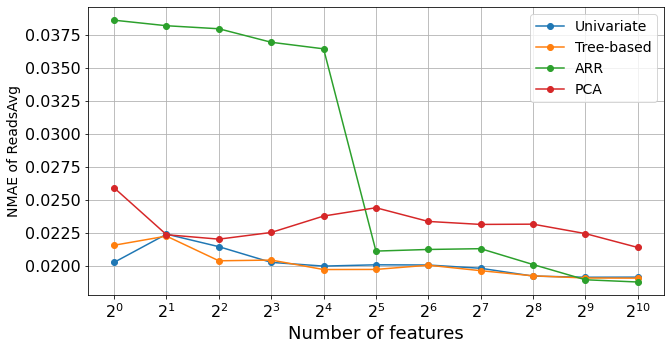

In [16]:
#a=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,40,48,56,64,96,128,192,256,512,1024]
a = [0,1,3,7,9,11,15,19,21,23,24,25,26,27,28,29]

def sortindex(list,indexs):
    _ = []
    for a in indexs:
        _.append(list[a])
    return _

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_nmae,marker='o')
plt.plot(klist,r_tb_nmae,marker='o')
plt.plot(klist,r_arr_nmae,marker='o')
plt.plot(klist,r_pca_nmae,marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pc_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_arr_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_pca_nmae,a),marker='o')


font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
plt.legend(('Univariate','Tree-based','ARR','PCA'), 
           loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
plt.savefig("./Fig/flash_NMAE.png",dpi=300,bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_pc_time,marker='o')
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_arr_time,marker='o')
plt.plot(klist,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
plt.legend(('Univariate','Tree-based',
            'ARR','PCA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=2)
ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_xlim(0,200)
#ax.set_ylim(0,6)

plt.grid()
plt.savefig("./Fig/flash_time.png",dpi=300,bbox_inches='tight')

In [193]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



10.239991664886475


In [132]:
from sklearn import linear_model

def fit_linear_reg(X,Y,X_test,Y_test):
    #Fit linear regression model and return RSS and R squared values
    start_time = time.time()
    model_k = linear_model.LinearRegression(fit_intercept = True)
    #start_time = float(time.time())
    model_k.fit(X,Y)
    #end_time = float(time.time())
    end_time = time.time()
    timec=end_time - start_time
    #RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    NMAE=np.mean(np.abs(model_k.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [154]:
r_pc = pd.read_csv('read_p_c.csv')
r_pc_f=r_pc.iloc[2:,0].tolist()
X_train_pc=X_train[r_pc_f]
X_test_pc=X_test[r_pc_f]
r_pc_nmae=[]
r_pc_time=[]

In [163]:
r_tb = pd.read_csv('read_t_b.csv')
r_tb_f=r_tb.iloc[0:,0].tolist()
X_train_tb=X_train[r_tb_f]
X_test_tb=X_test[r_tb_f]
r_tb_nmae=[]
r_tb_time=[]

In [179]:
r_arr = pd.read_csv('read_arr.csv')
r_arr_f=r_arr.iloc[0:,0].tolist()
X_train_arr=X_train[r_arr_f]
X_test_arr=X_test[r_arr_f]
r_arr_nmae=[]
r_arr_time=[]

In [ ]:
klist=[]
for k in range(0,6):
    klist.append(2**k)

In [223]:
klist1=[]
for k in range(1,33):
    klist1.append(k)

In [224]:
def linear_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_linear_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [225]:
def linear_training_pca(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:
        error,timec = fit_linear_reg(X_train_f[:,0:k],Y_train_r,X_test_f[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [226]:
r_pc_nmae=[]
r_pc_time=[]
linear_training_f(klist1,X_train_pc,Y_train_r,X_test_pc,Y_test_r,r_pc_nmae,r_pc_time)

In [227]:
r_tb_nmae=[]
r_tb_time=[]
linear_training_f(klist1,X_train_tb,Y_train_r,X_test_tb,Y_test_r,
                  r_tb_nmae,r_tb_time)

In [228]:
r_arr_nmae=[]
r_arr_time=[]
linear_training_f(klist1,X_train_arr,Y_train_r,X_test_arr,Y_test_r,
                  r_arr_nmae,r_arr_time)

In [229]:
r_pca_nmae=[]
r_pca_time=[]
linear_training_pca(klist1,X_train_pca,Y_train_r,X_test_pca,Y_test_r,
                  r_pca_nmae,r_pca_time)

<ipython-input-243-eaf0b10aa3a9>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


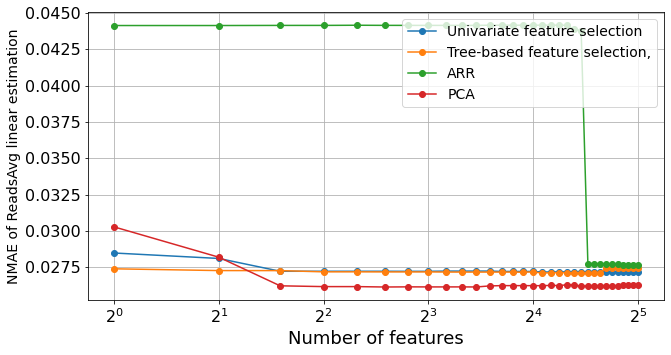

In [243]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist1,r_pc_nmae,marker='o')
plt.plot(klist1,r_tb_nmae,marker='o')
plt.plot(klist1,r_arr_nmae,marker='o')
plt.plot(klist1,r_pca_nmae,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg linear estimation', fontsize=font_size-4)
plt.legend(('Univariate feature selection','Tree-based feature selection,',
            'ARR','PCA'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
plt.grid()
#plt.savefig(r"\kth course\network analytics\project\pic\3.3.png",dpi=300,bbox_inches='tight')

<ipython-input-245-dd779a0b44f8>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)
<ipython-input-245-dd779a0b44f8>:21: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log",basey=10)


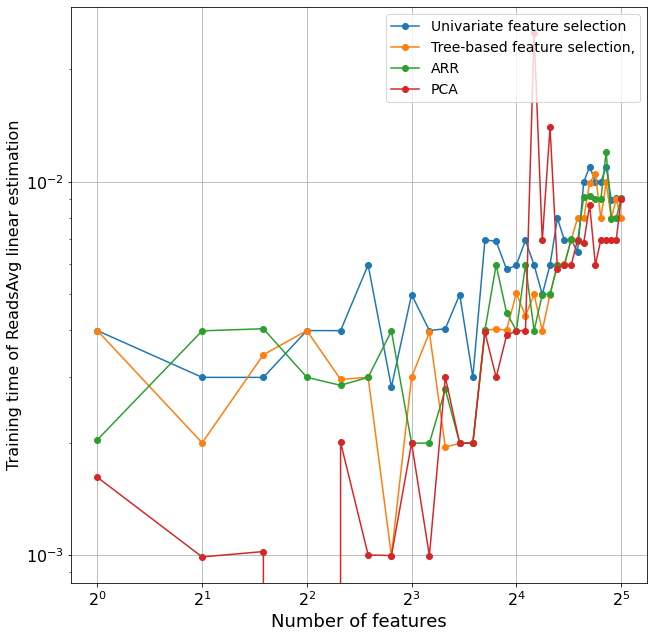

In [245]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist1,r_pc_time,marker='o')
plt.plot(klist1,r_tb_time,marker='o')
plt.plot(klist1,r_arr_time,marker='o')
plt.plot(klist1,r_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time of ReadsAvg linear estimation', fontsize=font_size-2)
plt.legend(('Univariate feature selection','Tree-based feature selection,',
            'ARR','PCA'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=10)
plt.grid()
#plt.savefig(r"\kth course\network analytics\project\pic\3.3.png",dpi=300,bbox_inches='tight')

In [234]:
w_pc = pd.read_csv('write_p_c.csv')
w_pc_f=w_pc.iloc[2:,0].tolist()
X_train_pc_w=X_train[w_pc_f]
X_test_pc_w=X_test[w_pc_f]
w_pc_nmae=[]
w_pc_time=[]

In [235]:
w_tb = pd.read_csv('write_t_b.csv')
w_tb_f=w_tb.iloc[0:,0].tolist()
X_train_tb_w=X_train[w_tb_f]
X_test_tb_w=X_test[w_tb_f]
w_tb_nmae=[]
w_tb_time=[]

In [236]:
w_pc_nmae=[]
w_pc_time=[]
linear_training_f(klist1,X_train_pc_w,Y_train_w,X_test_pc_w,Y_test_w,w_pc_nmae,w_pc_time)

In [237]:
w_tb_nmae=[]
w_tb_time=[]
linear_training_f(klist1,X_train_tb_w,Y_train_w,X_test_tb_w,Y_test_w,
                  w_tb_nmae,w_tb_time)

In [238]:
w_arr_nmae=[]
w_arr_time=[]
linear_training_f(klist1,X_train_arr,Y_train_w,X_test_arr,Y_test_w,
                  w_arr_nmae,w_arr_time)

In [239]:
w_pca_nmae=[]
w_pca_time=[]
linear_training_pca(klist1,X_train_pca,Y_train_w,X_test_pca,Y_test_w,
                  w_pca_nmae,w_pca_time)


<ipython-input-247-99afd87bf981>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


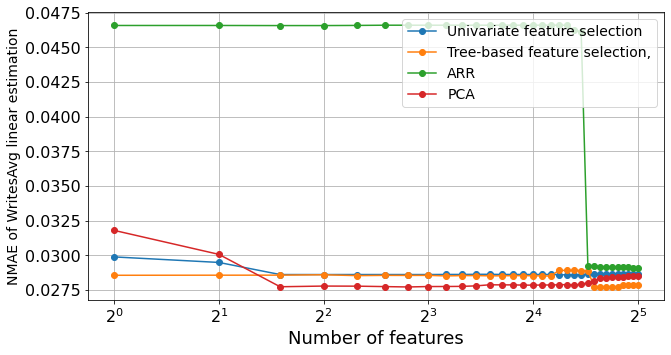

In [247]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist1,w_pc_nmae,marker='o')
plt.plot(klist1,w_tb_nmae,marker='o')
plt.plot(klist1,w_arr_nmae,marker='o')
plt.plot(klist1,w_pca_nmae,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('NMAE of WritesAvg linear estimation', fontsize=font_size-4)
plt.legend(('Univariate feature selection','Tree-based feature selection,',
            'ARR','PCA'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
plt.grid()
#plt.savefig(r"\kth course\network analytics\project\pic\3.3.png",dpi=300,bbox_inches='tight')


<ipython-input-246-68bc546aafc2>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)
<ipython-input-246-68bc546aafc2>:21: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log",basey=10)


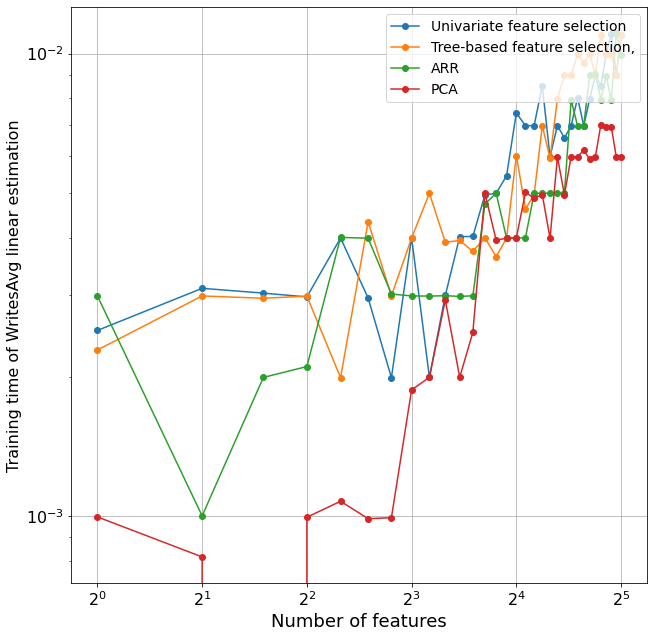

In [246]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist1,w_pc_time,marker='o')
plt.plot(klist1,w_tb_time,marker='o')
plt.plot(klist1,w_arr_time,marker='o')
plt.plot(klist1,w_pca_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time of WritesAvg linear estimation', fontsize=font_size-2)
plt.legend(('Univariate feature selection','Tree-based feature selection,',
            'ARR','PCA'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=10)
plt.grid()
#plt.savefig(r"\kth course\network analytics\project\pic\3.3.png",dpi=300,bbox_inches='tight')